In [1]:
!pip install pymongo


In [46]:
import pymongo
from pymongo import MongoClient


In [ ]:
mytree=ET.parse(r'D:\\Fourth Semester\\BDA\\dblp.xml')
root=mytree.getroot()
print(root)

In [47]:
import xml.etree.ElementTree as ET
client =pymongo.MongoClient()
db= client['i20-1853']
collection=db['DBLP_DATA']

In [48]:

d = {}
for i in root:
        d["type"]=i.tag
        for x in i:
            d[x.tag]=x.text
        collection.insert_one(d)
        d={}



<BarContainer object of 87 artists>

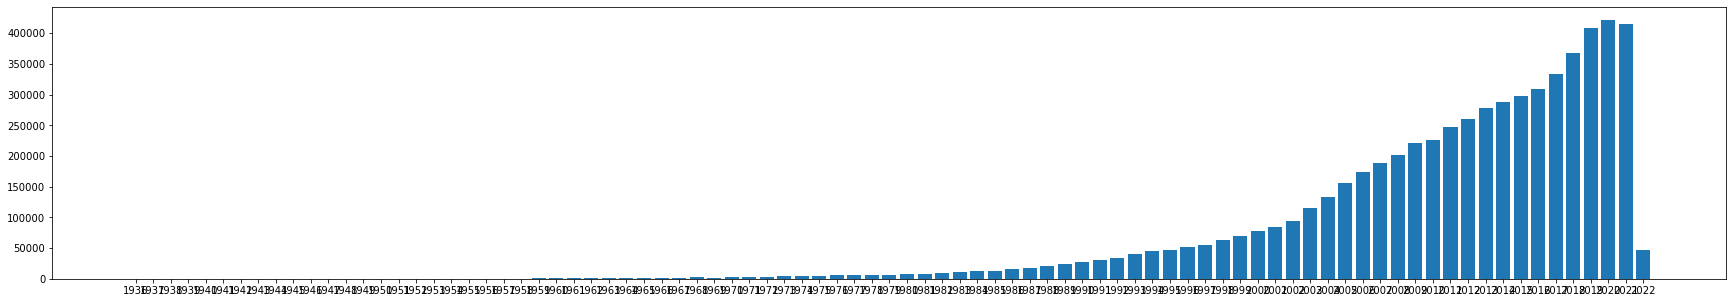

In [180]:
# qs1 Make Bar-chart for Publications per year and Explain your Findings.
list_years=[]
for i in collection.find({},{'year':1,'_id':0}):
    try:
        list_years.append(i['year'])
    except:
        pass

import numpy as np
a=np.unique(list_years)
a

ro=["year sum"]
df1=pd.DataFrame(columns=a,index=ro)
df1=df1.fillna(0)
for j in list_years:
    df1[j]=df1[j]+1
df1
## to make plot
b=df1.columns
listt_count=[]
aa=df1.iloc [0]
for i in aa:
    listt_count.append(i)
fig = plt.figure(figsize = (30,5))
plt.bar(b,listt_count)


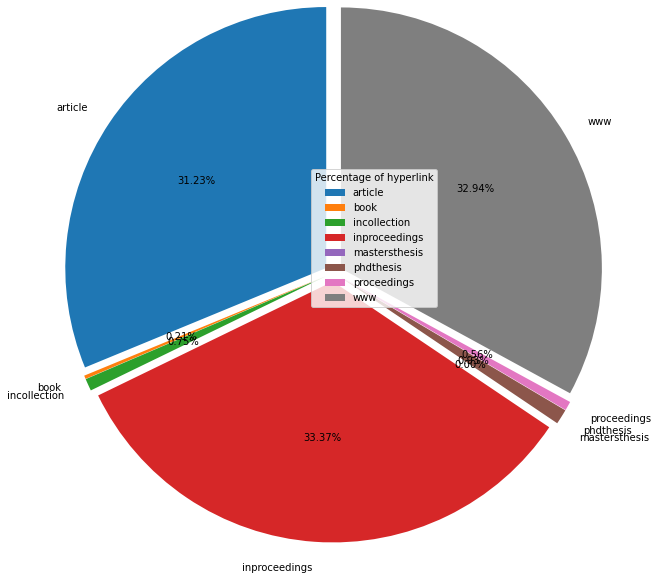

In [181]:
# Question 2. Make Pie showing Number of Bibliography based on Element Types i.e
typee=[]
for i in collection.find({},{'type':1,'_id':0}):
    try:
        typee.append(i['type'])
    except:
        pass

import numpy as np
a=np.unique(typee)
a
ro=["type sum"]
df_4=pd.DataFrame(columns=a,index=ro)
df_4=df_4.fillna(0)
for j in typee:
    df_4[j]=df_4[j]+1
# picking data from dataframe 
b=df_4.columns
listtCount=[]
aa=df_4.iloc [0]
for i in aa:
    listtCount.append(i)
# code for barplot 
import matplotlib.pyplot as plt
plt.pie(listtCount,labels=b,autopct="%0.2f%%",startangle=90, explode=(0.1, 0.1,0.1,0.1,0.1,0.1,0.1,  0.1),radius=3)
plt.legend(title="Bibliography based on Element Types")
plt.show()

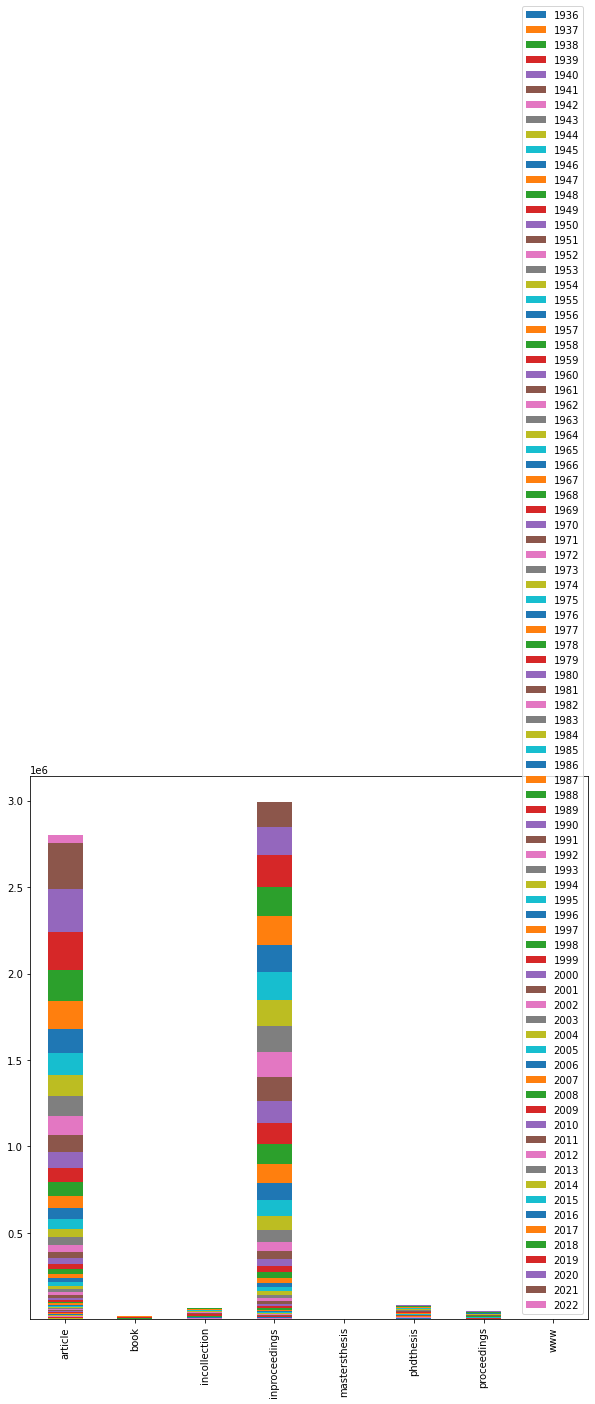

In [206]:
# QUESTION 3
list_years=[]
TypeOfElement=[] 
import numpy as np
for i in collection.find({},{'year':1,'_id':0,'type':1}):
    try:
        list_years.append(i['year'])
        TypeOfElement.append(i['type'])
    except:
        pass
a=np.unique(list_years)
b=np.unique(TypeOfElement)
import pandas as pd
df = pd.DataFrame(columns=a,index =b)
df=df.fillna(0)

######3333
for i in collection.find({},{'year':1,'_id':0,'type':1}):
    try:
        df[i['year']][i['type']]=df[i['year']][i['type']]+1
    except:
        pass
    
df.plot(kind='bar', stacked=True, figsize=(10,10), edgecolor='None')
plt.show()

In [200]:
print("Kk")

Kk


<BarContainer object of 8 artists>

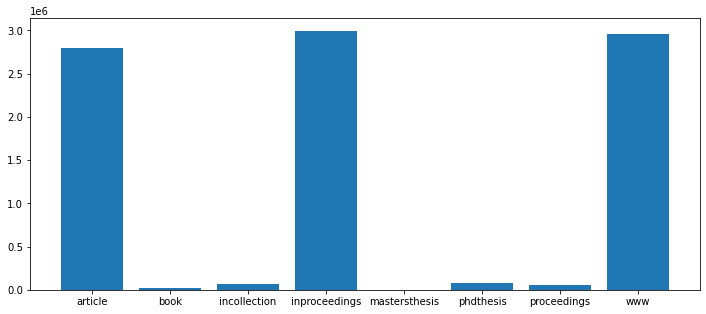

In [196]:
# Question 4
# to find total number of publications on the basis of ee link 
# it will demonstrate that  which ttpe have how many links
import pandas as pd
typee=[]
for i in collection.find({},{'type':1,'_id':0}):
    try:
        typee.append(i['type'])
    except:
        pass
import numpy as np
total_unique_types=np.unique(typee)
#array(['article', 'book', 'incollection', 'inproceedings','mastersthesis', 'phdthesis', 'proceedings', 'www'], dtype='<U13')
t=len(total_unique_types)
listEEcount=[]
for i in range(0,t):
    listEEcount.append(0)
for i in collection.find({},{'type':1,'_id':0,'ee':1}):
    try:
        #print("1111111",i['type'],"2222",i['ee'])
        count=0
        for j in total_unique_types:
            if(j==i['type']):
                listEEcount[count]= listEEcount[count]+1
            count=count+1
            
    except:
        pass

import matplotlib.pyplot as plt
# plt.pie(listEEcount,labels=total_unique_types,autopct="%0.2f%%",startangle=90, explode=(0.1, 0.1,0.1,0.1,0.1,0.1,0.1,  0.1),radius=3)
fig = plt.figure(figsize = (12,5))
plt.bar(total_unique_types,listEEcount)


# Question 5 calculate total isbn of each type

<BarContainer object of 8 artists>

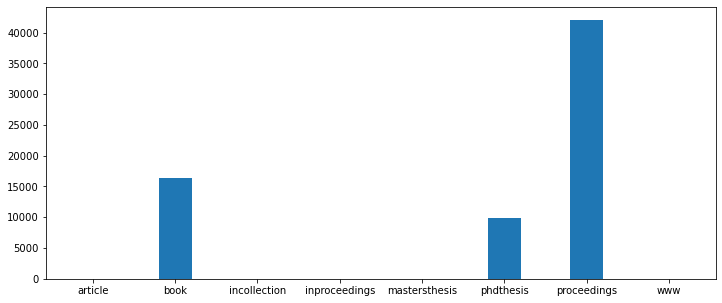

In [183]:
b=np.unique(TypeOfElement)
l=["ISBN sum"]
df5=pd.DataFrame(columns=b,index=l)
df5=df5.fillna(0)

for i in collection.find({},{'type':1,'_id':0,'isbn':1}):
    try:
        if (i['isbn']):
            df5[i['type']]=df5[i['type']]+1
    except:
        pass

b=df5.columns
listtCount=[]
aa=df5.iloc [0]
for i in aa:
    listtCount.append(i)
fig = plt.figure(figsize = (12,5))
plt.bar(b,listtCount,width = 0.4)


In [ ]:
#Make Bar-chart for Publications isbn based on eachtype